In [1]:
import tensorflow as tf
import cv2 
import matplotlib.pyplot as pt

In [2]:
import numpy as np
from tensorflow.keras.preprocessing import image


In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img

In [4]:
from tensorflow.keras.optimizers import RMSprop 


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


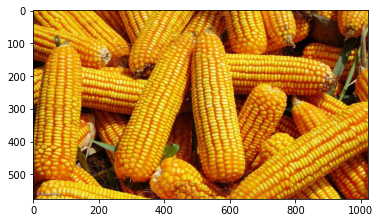

In [6]:
img=image.load_img('/content/drive/MyDrive/crop/image123.jpg')
pt.imshow(img)

In [8]:
cv2.imread('/content/drive/MyDrive/crop/image123.jpg')

array([[[ 20, 167, 223],
        [ 19, 166, 222],
        [ 12, 161, 218],
        ...,
        [  5, 142, 210],
        [ 16, 153, 221],
        [ 12, 149, 217]],

       [[ 10, 158, 210],
        [  5, 153, 205],
        [  5, 153, 205],
        ...,
        [ 17, 152, 220],
        [ 30, 163, 231],
        [ 33, 166, 234]],

       [[  1, 151, 192],
        [  0, 148, 189],
        [  3, 152, 196],
        ...,
        [ 23, 151, 222],
        [ 38, 165, 234],
        [ 64, 188, 255]],

       ...,

       [[ 19,  26,  59],
        [  3,  10,  43],
        [  3,   6,  44],
        ...,
        [  8,  20, 132],
        [  9,  19, 133],
        [  9,  20, 134]],

       [[ 21,  24,  55],
        [  7,   9,  43],
        [  7,   8,  46],
        ...,
        [  3,  14, 126],
        [  5,  15, 129],
        [  6,  17, 131]],

       [[ 23,  25,  55],
        [ 10,  13,  44],
        [ 11,  12,  50],
        ...,
        [  0,  10, 122],
        [  1,  13, 125],
        [  1,  15, 127]]

In [10]:
cv2.imread('/content/drive/MyDrive/crop/image123.jpg').shape

(575, 1022, 3)

In [9]:
train=ImageDataGenerator(rescale=1/255)
validation=ImageDataGenerator(rescale=1/255)

In [11]:
train_dataset=train.flow_from_directory('/content/drive/MyDrive/crop/training_crop', target_size=(600,600), class_mode='binary', batch_size=50)

Found 492 images belonging to 9 classes.


In [12]:
validation_dataset=validation.flow_from_directory('/content/drive/MyDrive/crop/validation_crop', target_size=(600,600), class_mode='binary', batch_size=50)

Found 492 images belonging to 9 classes.


In [13]:
train_dataset.class_indices

{'Ground_NUT': 0,
 'arhar': 1,
 'cotton': 2,
 'maize': 3,
 'moong': 4,
 'paddy': 5,
 'rapeseed': 6,
 'sugarcane': 7,
 'wheat': 8}

In [ ]:
validation_dataset.class_indices

{'Ground_NUT': 0,
 'arhar': 1,
 'cotton': 2,
 'maize': 3,
 'moong': 4,
 'paddy': 5,
 'rapeseed': 6,
 'sugarcane': 7,
 'wheat': 8}

In [ ]:
train_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5,

In [ ]:
validation_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5,

In [14]:
model=tf.keras.models.Sequential(
[
    tf.keras.layers.Conv2D(18,(3,3), activation='relu', input_shape=(600,600,3)), 
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(36,(3,3), activation='relu', input_shape=(600,600,3)), 
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(72,(3,3), activation='relu', input_shape=(600,600,3)), 
    tf.keras.layers.MaxPool2D(2,2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid'),
])

In [15]:
model.compile(loss='binary_crossentropy',
             optimizer=RMSprop(lr=0.1),
             metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [16]:
model

In [17]:
model.fit(train_dataset, steps_per_epoch=2, epochs=25, validation_data=validation_dataset)

Epoch 1/25
2/2 [==============================] - 364s 311s/step - loss: -18022047744.0000 - accuracy: 0.0900 - val_loss: -1974760898560.0000 - val_accuracy: 0.1220
Epoch 2/25
2/2 [==============================] - 115s 80s/step - loss: -9546463444992.0000 - accuracy: 0.1400 - val_loss: -89872165502976.0000 - val_accuracy: 0.1220
Epoch 3/25
2/2 [==============================] - 108s 79s/step - loss: -178594353512448.0000 - accuracy: 0.1300 - val_loss: -707080935702528.0000 - val_accuracy: 0.1220
Epoch 4/25
2/2 [==============================] - 105s 78s/step - loss: -1160358832111616.0000 - accuracy: 0.0900 - val_loss: -2813588515323904.0000 - val_accuracy: 0.1220
Epoch 5/25
2/2 [==============================] - 106s 78s/step - loss: -3958291252117504.0000 - accuracy: 0.1300 - val_loss: -7735028867923968.0000 - val_accuracy: 0.1220
Epoch 6/25


KeyboardInterrupt: ignored

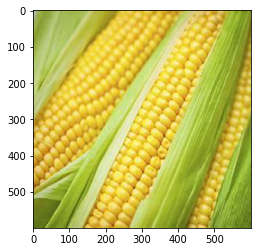

Arhar



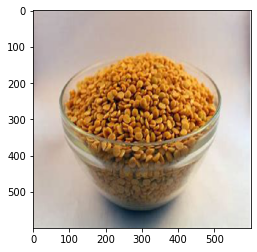

Arhar



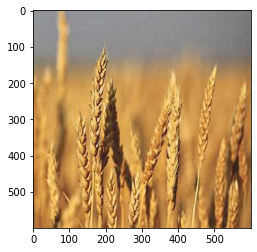

Arhar



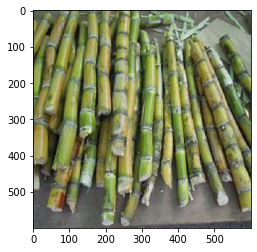

Arhar



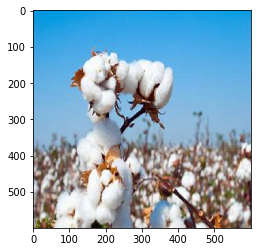

Arhar



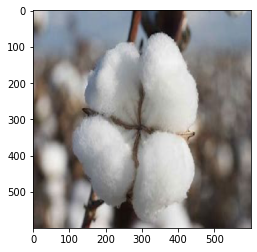

Arhar



In [18]:
import os
path='/content/drive/MyDrive/crop/test_crop'
for i in os.listdir(path):
  img = load_img(path +'//'+ i,target_size=(600,600))
  pt.imshow(img)
  pt.show()

  X= image.img_to_array(img)
  X= np.expand_dims(X,axis=0)
  images=np.hstack([X])
  v=model.predict(images)
  if v==0:
    print ('Ground_NUT\n')
  elif v==1:
    print( 'Arhar\n')
  elif v==2:
    print( 'Cotton\n')   
  elif v==3:
    print( 'maize\n')
  elif v==4:
    print( 'moong\n')     
  elif v==5:
    print( 'paddy\n')
  elif v==6:
    print( 'rapeseed\n') 
  elif v==7:
    print( 'sugar\n')
  elif v==8:
    print( 'wheat\n')     
